In [3]:
#SVM-Example-BlueorRed

In [4]:
#Import Core Libraries
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score, recall_score,precision_score
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [5]:
#Read the file
mydata=pd.read_csv("BlueorRed.csv")
mydata.head()

FileNotFoundError: [Errno 2] No such file or directory: 'BlueorRed.csv'

In [6]:
#Define X and Y
X=mydata.iloc[:,1:9]
Y=mydata["Undecided"]
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)
X_train.shape

(7000, 8)

In [7]:
#Build the SVM Model for linear kernel
svc_model=SVC(kernel="linear",probability=True)
SVM1=svc_model.fit(X_train,Y_train)
SVM1
SVM1.decision_function(X_train)

array([-1.00018618,  1.08375443, -0.061469  , ..., -2.38642901,
        1.22849585, -0.00941653])

In [8]:
#Overall Accuracy,recall,precision
Prediction=SVM1.predict(X_train)
print("Accuracy=","{:.4f}".format(accuracy_score(Y_train,Prediction)))
print("Recall=","{:.4f}".format(recall_score(Y_train,Prediction)))
print("Precision","{:.4f}".format(precision_score(Y_train,Prediction)))

Accuracy= 0.7857
Recall= 0.6122
Precision 0.8081


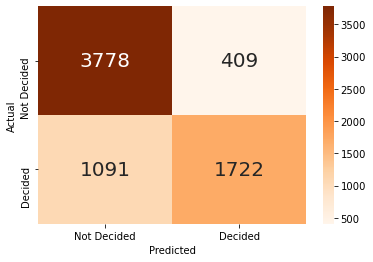

In [9]:
#Getting Confusion Matrix
confusion=confusion_matrix(Y_train,Prediction)
sns.heatmap(confusion,annot=True,cmap="Oranges",annot_kws={"size":20},fmt="0.0f",
           xticklabels=["Not Decided","Decided"],
           yticklabels=["Not Decided","Decided"])
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

In [10]:
#Getting Probabilities
Probability=SVM1.predict_proba(X_train)
Probability=pd.DataFrame(Probability)
Probability

,0,1
0,0.694415,0.305585
1,0.215386,0.784614
2,0.467242,0.532758
3,0.565188,0.434812
4,0.575280,0.424720
...,...,...
6995,0.373574,0.626426
6996,0.655864,0.344136
6997,0.902624,0.097376
6998,0.191588,0.808412


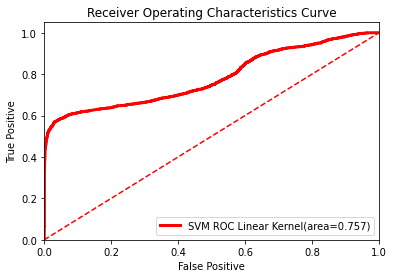

In [11]:
#ROC Curve
svmroc=roc_auc_score(Y_train,Prediction)
fpr,tpr,thresholds=roc_curve(Y_train,Probability[1])
plt.figure()
plt.plot(fpr,tpr,color="red",lw=3,label="SVM ROC Linear Kernel(area=%0.3f)" %svmroc)
plt.plot([0,1],[0,1],"r--")
plt.xlim([0,1])
plt.ylim([0,1.05])
plt.xlabel("False Positive")
plt.ylabel("True Positive")
plt.title("Receiver Operating Characteristics Curve")
plt.legend(loc="lower right")
plt.show()

In [12]:
#Overall Accuracy,recall,precision
Prediction=SVM1.predict(X_test)
print("Accuracy=","{:.4f}".format(accuracy_score(Y_test,Prediction)))
print("Recall=","{:.4f}".format(recall_score(Y_test,Prediction)))
print("Precision","{:.4f}".format(precision_score(Y_test,Prediction)))

Accuracy= 0.7843
Recall= 0.6020
Precision 0.8105


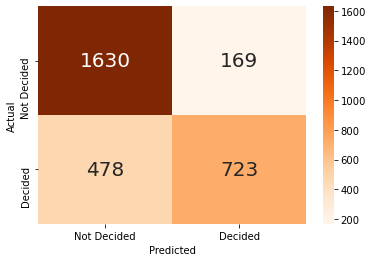

In [13]:
#Getting Confusion Matrix-test Data
confusion=confusion_matrix(Y_test,Prediction)
sns.heatmap(confusion,annot=True,cmap="Oranges",annot_kws={"size":20},fmt="0.0f",
           xticklabels=["Not Decided","Decided"],
           yticklabels=["Not Decided","Decided"])
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()